In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\Supervised ML\Class work\car_evaluation.csv")
df.head()

,Buying_cost,Maintainence_cost,doors,persons,luggage_capacity,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.shape

(1728, 7)

In [7]:
df['decision'].value_counts()

decision
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Buying_cost          0
Maintainence_cost    0
doors                0
persons              0
luggage_capacity     0
safety               0
decision             0
dtype: int64

In [9]:
X = df.drop('decision',axis=1)
Y = df['decision']

In [10]:
# X = pd.get_dummies(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [13]:
df.columns

Index(['Buying_cost', 'Maintainence_cost', 'doors', 'persons',
       'luggage_capacity', 'safety', 'decision'],
      dtype='object')

In [14]:
encoder = ce.OrdinalEncoder(cols=['Buying_cost', 'Maintainence_cost', 'luggage_capacity', 'safety','doors','persons'])

In [15]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [16]:
X_train

,Buying_cost,Maintainence_cost,doors,persons,luggage_capacity,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3
...,...,...,...,...,...,...
1130,2,3,2,1,3,1
1294,2,2,1,1,1,2
860,4,2,1,1,3,1
1459,3,4,3,3,2,2


In [17]:
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=0)

In [18]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [19]:
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9624277456647399

Classification Report:
               precision    recall  f1-score   support

         acc       0.96      0.89      0.92        83
        good       0.67      0.91      0.77        11
       unacc       0.98      1.00      0.99       235
       vgood       0.93      0.82      0.87        17

    accuracy                           0.96       346
   macro avg       0.89      0.91      0.89       346
weighted avg       0.97      0.96      0.96       346


Confusion Matrix:
 [[ 74   5   4   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  3   0   0  14]]


In [20]:
feature_scores = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety               0.279837
persons              0.230626
Buying_cost          0.178745
Maintainence_cost    0.148033
luggage_capacity     0.095862
doors                0.066898
dtype: float64

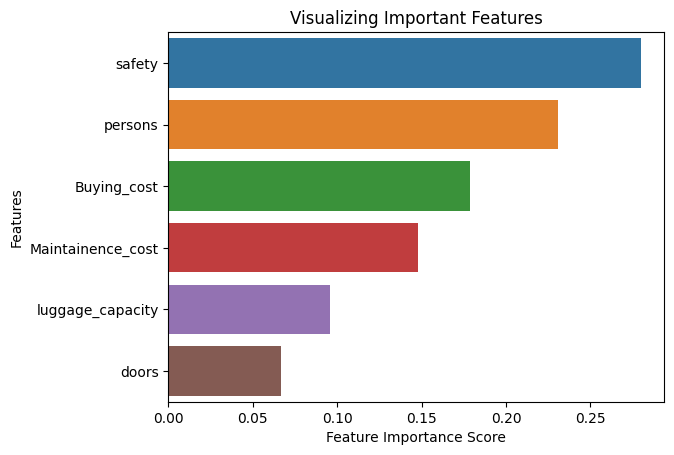

In [21]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()